In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
import os
from tqdm import tqdm

# Add the project root
sys.path.append(os.path.abspath('../../'))

from src.useful_functions import read_dirs_paths
from src.mokito.modules import *

# For matplotlib
font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# Read directory paths
read_dirs_paths('dir_paths.txt', globals())

Created variables:
inp_dir = input/
out_trajectories1 = output/trajectories/
out_trajectories2 = output/trajectories/openmm_files/
out_trajectories3 = output/trajectories/openmm_files/initial_states/
out_trajectories4 = output/trajectories/openmm_files/final_states/
out_isokann = output/isokann/
out_mokito = output/mokito/


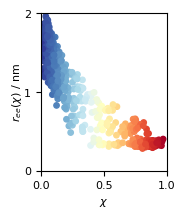

In [5]:
R   = np.loadtxt(out_trajectories1 +"R0.txt")     #  R0.shape = (Npoints,)
chi = np.loadtxt(out_isokann  +"chi0_.txt")   #  chi0.shape = (Npoints,)

font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig, ax = plt.subplots(1, 1, figsize=(16*in2cm, 16*in2cm), facecolor='white')


####################################
ax.scatter(chi, R, c = chi,  cmap = cm.RdYlBu_r , s = 15 )

#ax[1].set_title('(b) $\chi$-function')

ax.set_ylim(0,2)
ax.set_xlim(0,1)
#ax[1].axis('square')

ax.set_xlabel(r'$\chi$')
ax.set_ylabel(r'$r_{ee}(\chi)$ / nm',labelpad=0)

ax.set_xticks([0,0.5,1])
ax.set_yticks([0,1,2])

plt.subplots_adjust(left=0, bottom=0.0, right=1, top=0.99, wspace=0.4, hspace=0.0)
#ax[0].set_position([0.0, 0.205, 0.27, 0.58])
#ax[1].set_position([0.33, 0.205, 0.2, 0.58])

ax.set_position([0.66, 0.55, 0.2, 0.25])

fig.savefig("output/figures/fig1.png", format='png', dpi=300, bbox_inches='tight')


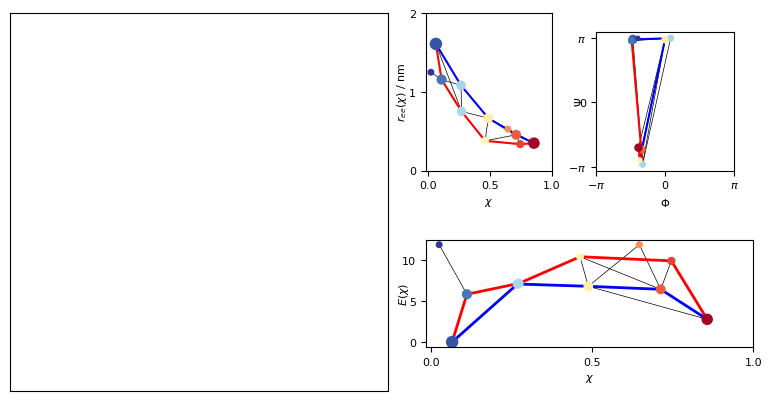

In [6]:
with open(out_mokito + "rel_coords_MKM.npy", 'rb') as f2:
    chi_nodes = np.load(f2)
    nodes_size = np.load(f2)
    R_nodes   = np.load(f2)
    Phi_nodes = np.load(f2)[:,1]
    Psi_nodes = np.load(f2)[:,1]


with open(out_mokito + "energy_MKM.npy", 'rb') as f1:
    A = np.load(f1)
    chi_nodes = np.load(f1)
    energy = np.load(f1)
    nodes_size = np.load(f1)

G = nx.read_gml(out_mokito + "MKM.gml")



font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig, ax = plt.subplots(1, 4, figsize=(16*in2cm, 16*in2cm), facecolor='white')


ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].axis('square')



##################



ax[1].scatter(chi_nodes, R_nodes, s = 0.2*nodes_size, c = chi_nodes, cmap = cm.RdYlBu_r)

for i in range(len(R_nodes)):
    for j in range(i+1,len(R_nodes)):
        if A[i,j]>0:
            ax[1].plot([chi_nodes[i], chi_nodes[j]], [R_nodes[i], R_nodes[j]], 'k-', linewidth = 0.5,zorder=-1) 

##################
ax[2].scatter(Phi_nodes, Psi_nodes, s = 0.1*nodes_size, c = chi_nodes, cmap = cm.RdYlBu_r, zorder=0)

for i in range(len(R_nodes)):
    for j in range(i+1,len(R_nodes)):
        if A[i,j]>0:
            ax[2].plot([Phi_nodes[i], Phi_nodes[j]], [Psi_nodes[i], Psi_nodes[j]], 'k-', linewidth = 0.5,zorder=-1) 






##################

ax[3].scatter(chi_nodes, energy,  s = 0.2*nodes_size, c = chi_nodes, cmap = cm.RdYlBu_r,zorder=0)

for i in range(G.number_of_nodes()):
    for j in range(i+1,G.number_of_nodes()):
        if A[i,j]>0:
            ax[3].plot([chi_nodes[i], chi_nodes[j]], [energy[i], energy[j]], 'k-', linewidth = 0.5,zorder=-1) 




plt.subplots_adjust(left=0, bottom=0.0, right=1, top=0.99, wspace=0.4, hspace=0.0)


path = [0,1,4,5,7,10]
ax[1].plot(chi_nodes[path], R_nodes[path], 'r-', linewidth = 1.5, zorder=-1) 
ax[2].plot(Phi_nodes[path], Psi_nodes[path], 'r-', linewidth = 1.5, zorder=-1) 
ax[3].plot(chi_nodes[path], energy[path], 'r', linewidth = 2,zorder=-1)

path = [0,   3, 6 , 8 , 10]
ax[1].plot(chi_nodes[path], R_nodes[path], 'b-', linewidth = 1.5, zorder=-1) 
ax[2].plot(Phi_nodes[path], Psi_nodes[path], 'b-', linewidth = 1.5, zorder=-1) 
ax[3].plot(chi_nodes[path], energy[path], 'b', linewidth = 2,zorder=-1)





#ax[0].set_title('(a) Molecular Kinetics Map')

ax[0].set_position([0, 0.0, 0.6, 1])

ax[1].set_position([0.66, 0.55, 0.2, 0.25])
ax[1].set_ylabel(r'$r_{ee}(\chi)$ / nm',labelpad=0)

ax[1].set_xticks([0,0.5,1])
ax[1].set_yticks([0,1,2])
#ax[1].set_title(r'(b) MKM on $r_{ee}$')
ax[1].set_xlabel(r'$\chi$')
ax[1].set_ylim(0,2)

ax[2].set_position([0.93, 0.55, 0.22, 0.22])

ax[2].set_xticks([-np.pi, 0, np.pi])
ax[2].set_yticks([-np.pi, 0, np.pi])
ax[2].set_xticklabels([r'$-\pi$', 0, r'$\pi$'])
ax[2].set_yticklabels([r'$-\pi$', 0, r'$\pi$'])
#ax[2].set_title(r'(c) MKM on $\Phi_{G1}\Psi_{G1}$')
ax[2].set_xlabel(r'$\Phi$')
ax[2].set_ylabel(r'$\Psi$',labelpad=-12)


ax[3].set_position([0.66, 0.27, 0.52, 0.17])

ax[3].set_xlabel(r'$\chi$')
ax[3].set_ylabel(r'$E(\chi)$',labelpad=-7)
#ax[3].set_title(r'(d) Energy landscape')
ax[3].set_xticks([0,0.5,1])


fig.savefig("output/figures/fig2.png", format='png', dpi=300, bbox_inches='tight')
